In [1]:
import yfinance as yf
import sqlite3
import pandas as pd
from datetime import datetime


/Users/luiza/bitcoin/bitcoin_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [32]:
import sqlite3
print(sqlite3.sqlite_version)

3.43.2


In [ ]:
btc_data= yf.download("BTC-USD", start="2017-01-01", end= datetime.today().date(), interval="1d")

[*********************100%***********************]  1 of 1 completed


In [34]:
print(btc_data.head())

Price             Close         High          Low         Open     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-01-01   998.325012  1003.080017   958.698975   963.658020  147775008
2017-01-02  1021.750000  1031.390015   996.702026   998.617004  222184992
2017-01-03  1043.839966  1044.079956  1021.599976  1021.599976  185168000
2017-01-04  1154.729980  1159.420044  1044.400024  1044.400024  344945984
2017-01-05  1013.380005  1191.099976   910.416992  1156.729980  510199008


In [35]:
conn = sqlite3.connect('bitcoin.db')

In [36]:
# Insert DataFrame data into the SQLite table
btc_data.to_sql('bitcoin_prices', conn, if_exists='append', index=False)

3005

In [37]:
conn.commit()
conn.close()

In [38]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3005 entries, 2017-01-01 to 2025-03-24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3005 non-null   float64
 1   (High, BTC-USD)    3005 non-null   float64
 2   (Low, BTC-USD)     3005 non-null   float64
 3   (Open, BTC-USD)    3005 non-null   float64
 4   (Volume, BTC-USD)  3005 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 140.9 KB


In [39]:
#change column names for convenience 
btc_data.rename(columns={
    '(Close, BTC-USD)':'Close'
    ,'(High, BTC-USD)': 'High'
    ,'(Low, BTC-USD)' : 'Low'
    ,'(Open, BTC-USD)' : 'Open'
    ,'(Volume, BTC-USD)' : 'Volume'}
    ,inplace=True )
    

array([[<Axes: title={'center': "('Close', 'BTC-USD')"}>]], dtype=object)

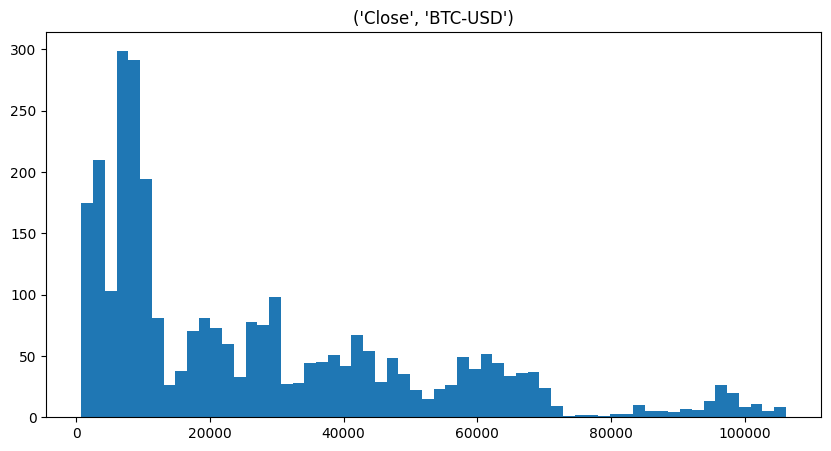

In [40]:
#create a detailed price histogram
btc_data.hist(column='Close', bins = 60, figsize=(10,5), grid= False)

<Axes: title={'center': 'Bitcoin Price'}, xlabel='Date'>

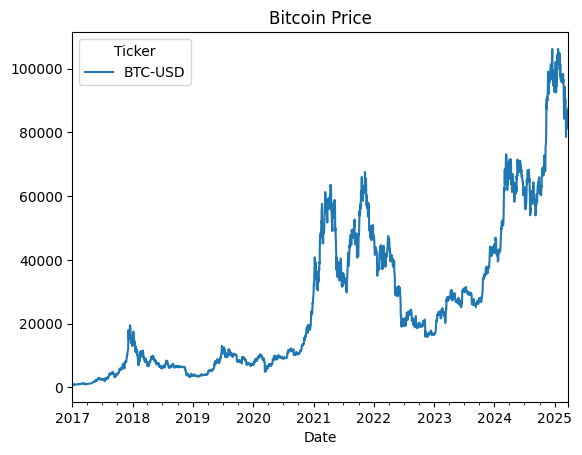

In [41]:
btc_data['Close'].plot(title = "Bitcoin Price")

In [45]:
print(btc_data['Close'].isna().sum())
print(btc_data.columns)

#write a function to calculate moving average. 
def moving_average(data,window):
    return data.rolling(window = window).mean()
#calculate moving average for 30 days
btc_data['MA30'] = moving_average(btc_data['Close', 'BTC-USD'], 30)
print(btc_data[['MA30']])

Ticker
BTC-USD    0
dtype: int64
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD'),
            (  'MA30',        '')],
           names=['Price', 'Ticker'])
Price               MA30
Ticker                  
Date                    
2017-01-01           NaN
2017-01-02           NaN
2017-01-03           NaN
2017-01-04           NaN
2017-01-05           NaN
...                  ...
2025-03-20  87335.596094
2025-03-21  86915.850521
2025-03-22  86432.468750
2025-03-23  86096.763021
2025-03-24  85794.134896

[3005 rows x 1 columns]


<Axes: title={'center': 'Bitcoin Price with 30-day Moving Average'}, xlabel='Date'>

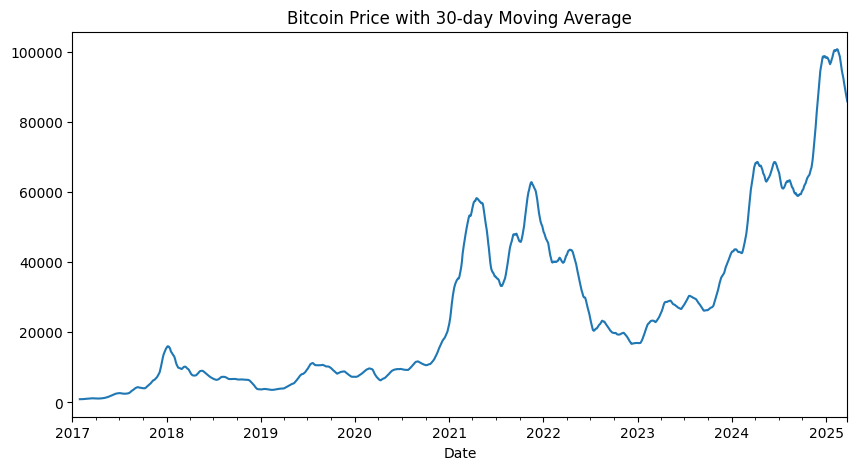

In [46]:
btc_data['MA30'].plot(title = "Bitcoin Price with 30-day Moving Average", figsize=(10,5), grid= False)  